In [5]:
import torch
import numpy as np
from hysteresis.base import TorchHysteresis
from hysteresis.training import train_torch
from hysteresis.visualization import plot_hysteresis_density
import matplotlib.pyplot as plt

calculating states
28897
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


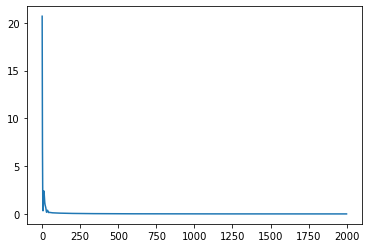

In [9]:
# get real h, m
data = torch.tensor(np.loadtxt('../argonne_data/argonne_data.txt'))
h = data.T[0]
m = data.T[1]

# normalize h, m
#h = (h - min(h)) / (max(h) - min(h))
m = (m - min(m)) / (max(m) - min(m))

H = TorchHysteresis(h, mesh_scale = 0.05)
print(len(H.mesh_points))

# train on data
loss_trace = train_torch(H, m, 2000)

In [ ]:
fig, ax = plt.subplots()
ax.plot(loss_trace)

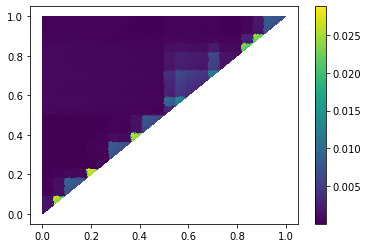

In [7]:
plot_hysteresis_density(H)
plt.show()

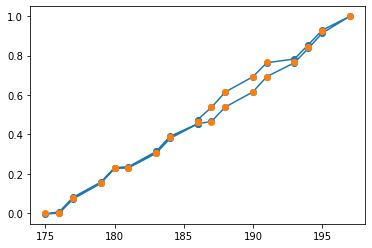

In [8]:
fig, ax = plt.subplots()
m_pred = H.predict_magnetization()
ax.plot(h, m_pred.detach(),'o-')
ax.plot(h, m,'o')